# Intro

At the end of this lesson, you will be able to write TensorFlow and Keras code to use one of the best models in computer vision.

# Lesson


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('sDG5tPtsbSA', width=800, height=450)

# Sample Code

### Choose Images to Work With

In [6]:
from os.path import join
import os,sys
sys.path.append('/datadrive2/amit_cvnd/deep-learning-tutorials-examples/tensorflow/7_kaggle/')

image_dir = '../input/dog-breed-identification/train/'
img_paths = [join(image_dir, filename) for filename in 
                           ['0246f44bb123ce3f91c939861eb97fb7.jpg',
                            '84728e78632c0910a69d33f82e62638c.jpg',
                            '8825e914555803f4c67b26593c9d5aff.jpg',
                            '91a5e8db15bccfb6cfa2df5e8b95ec03.jpg']]

### Function to Read and Prep Images for Modeling

In [7]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

### Create Model with Pre-Trained Weights File. Make Predictions

In [8]:
from tensorflow.python.keras.applications import ResNet50

my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

### Visualize Predictions

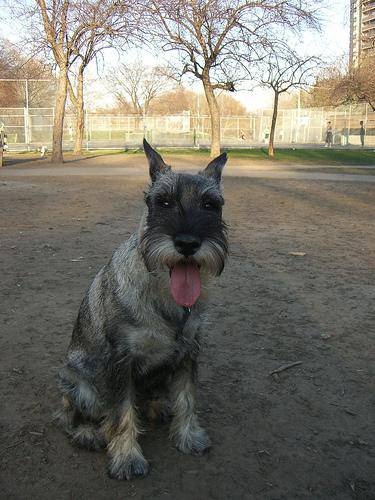

[('n02097209', 'standard_schnauzer', 0.5496893), ('n02097047', 'miniature_schnauzer', 0.42013028), ('n02097130', 'giant_schnauzer', 0.01966222)]


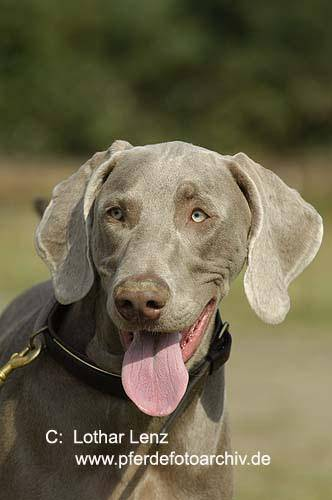

[('n02092339', 'Weimaraner', 0.9932476), ('n02099849', 'Chesapeake_Bay_retriever', 0.0026773105), ('n02109047', 'Great_Dane', 0.0013211624)]


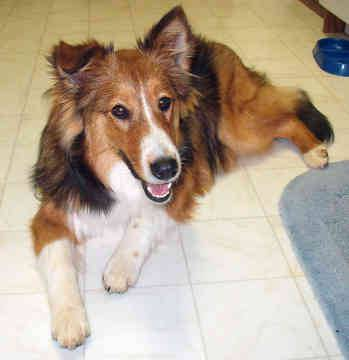

[('n02105855', 'Shetland_sheepdog', 0.95110303), ('n02106030', 'collie', 0.04380029), ('n02096294', 'Australian_terrier', 0.0012826562)]


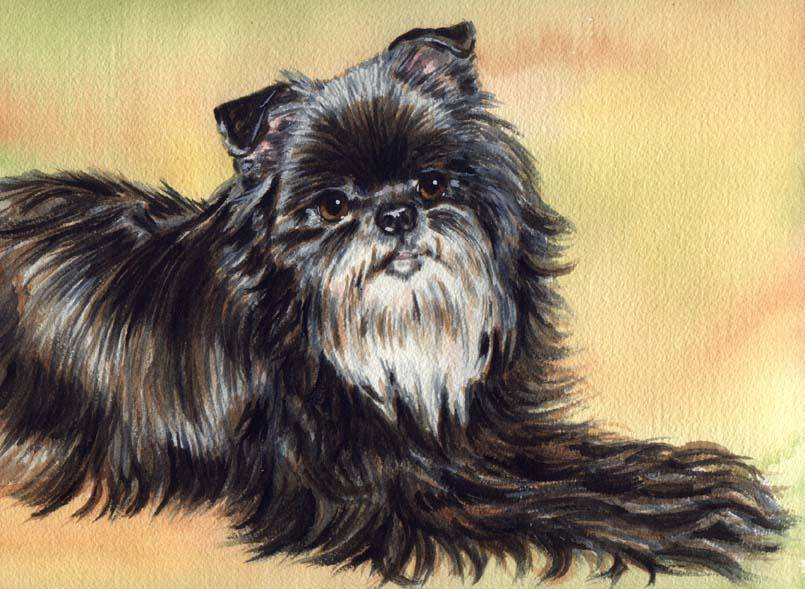

[('n02110627', 'affenpinscher', 0.9004124), ('n02112706', 'Brabancon_griffon', 0.05959987), ('n02086079', 'Pekinese', 0.0086528575)]


In [9]:
from learntools.deep_learning.decode_predictions import decode_predictions
from IPython.display import Image, display

most_likely_labels = decode_predictions(preds, top=3, class_list_path='../input/resnet50/imagenet_class_index.json')

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

# Exercise
Now you are ready to **[use a powerful TensorFlow model](#$EXERCISE_FORKING_URL$)** yourself.